In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/delhivery-logistics-dataset/delhivery.csv


# Let's Start the Data Dive

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/kaggle/input/delhivery-logistics-dataset/delhivery.csv')
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [3]:
df.shape

(144867, 24)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

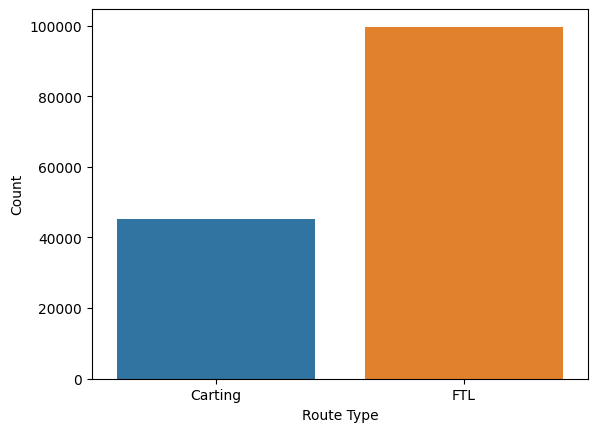

In [5]:
sns.countplot(data=df, x='route_type')
plt.xlabel('Route Type')
plt.ylabel('Count')
plt.show()

# Visualising some initial distributions

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


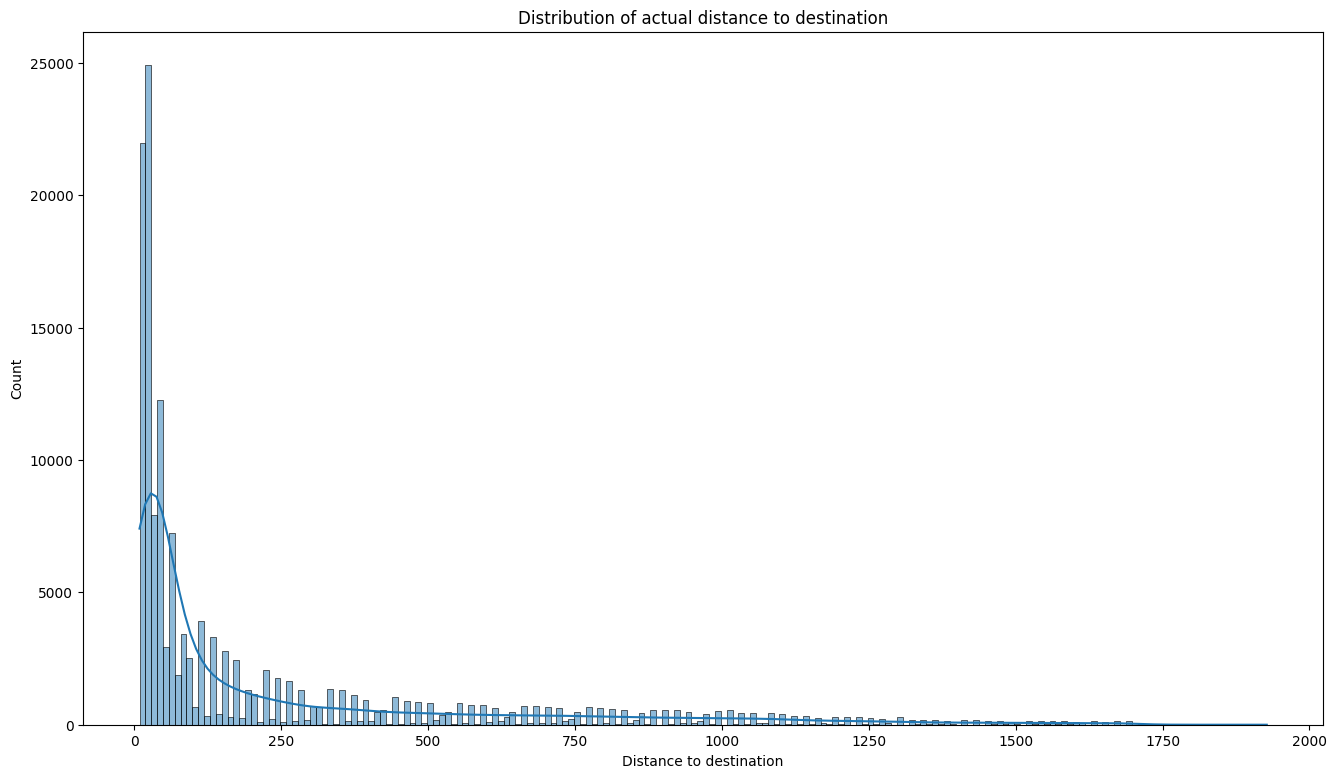

In [6]:
plt.figure(figsize=(16,9))
sns.histplot(data=df, x='actual_distance_to_destination', kde=True)
plt.title("Distribution of actual distance to destination")
plt.xlabel("Distance to destination")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

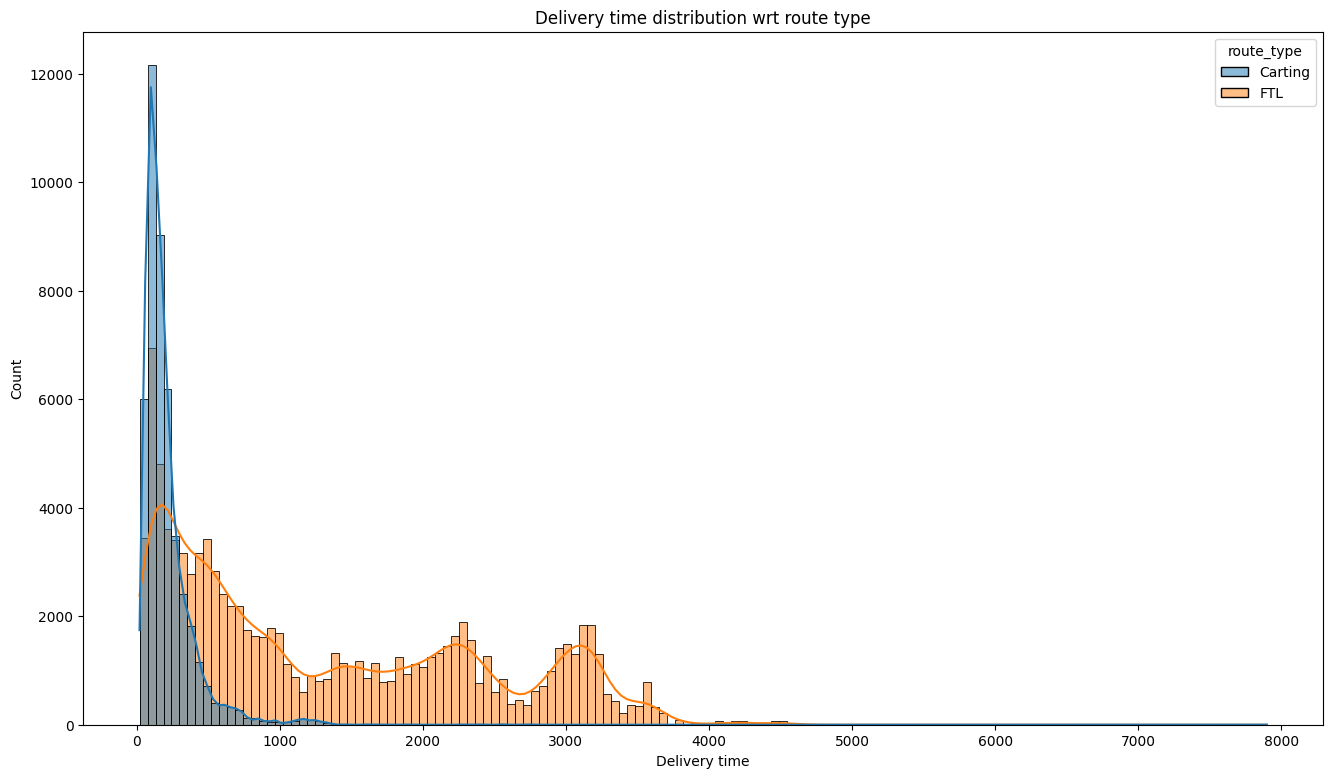

In [7]:
plt.figure(figsize=(16,9))
sns.histplot(data=df, x='start_scan_to_end_scan', hue='route_type', kde=True)
plt.title('Delivery time distribution wrt route type')
plt.xlabel('Delivery time')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

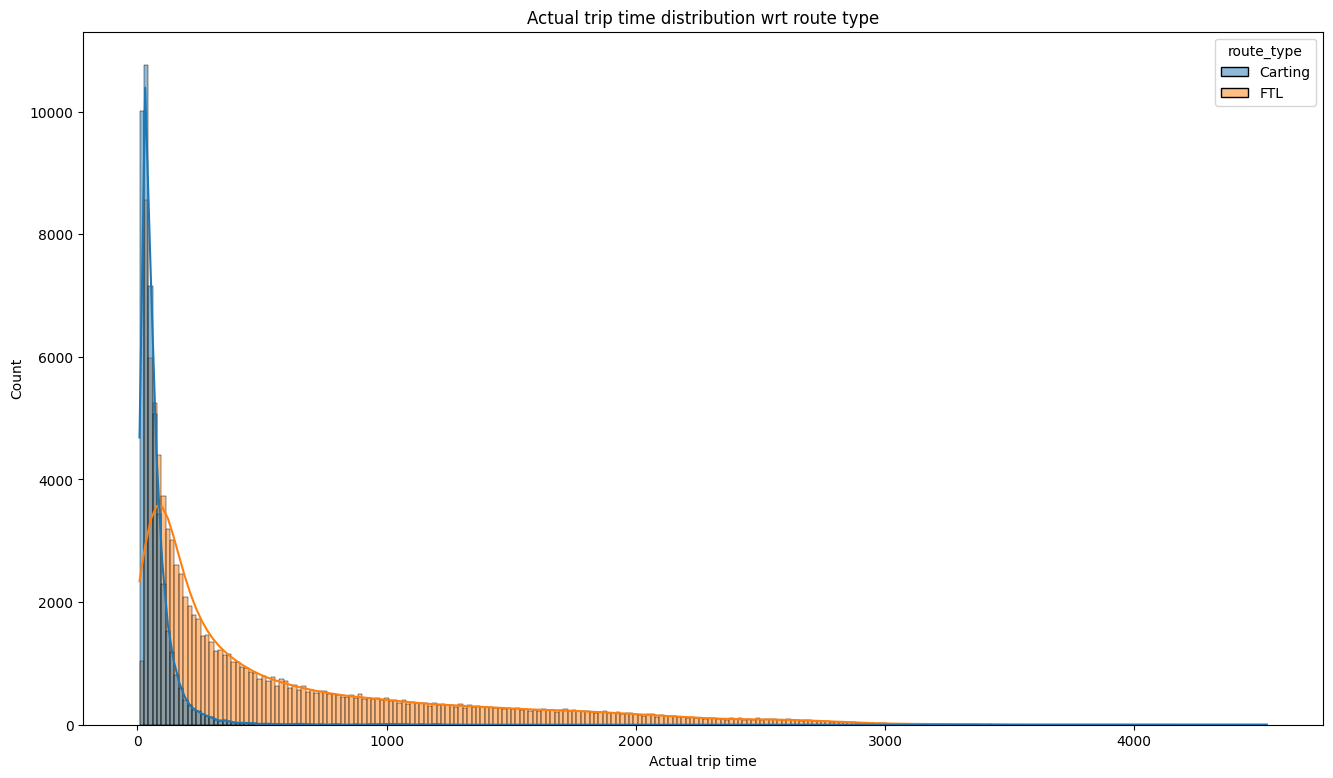

In [8]:
plt.figure(figsize=(16,9))
sns.histplot(data=df, x='actual_time', hue='route_type', kde=True)
plt.title('Actual trip time distribution wrt route type')
plt.xlabel('Actual trip time')
plt.show()

In [9]:
from datetime import datetime

df['od_start_time'] = pd.to_datetime(df['od_start_time'])
df['start_time'] = df['od_start_time'].dt.strftime('%H:%M:%S')
df['start_date'] = df['od_start_time'].dt.date
df['od_end_time'] = pd.to_datetime(df['od_end_time'])
df['end_time'] = df['od_end_time'].dt.strftime('%H:%M:%S')
df['end_date'] = df['od_end_time'].dt.date

In [10]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,start_time,start_date,end_time,end_date
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,11.9653,1.272727,14.0,11.0,11.9653,1.272727,03:21:32,2018-09-20,04:47:45,2018-09-20
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,21.7243,1.200000,10.0,9.0,9.7590,1.111111,03:21:32,2018-09-20,04:47:45,2018-09-20
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,32.5395,1.428571,16.0,7.0,10.8152,2.285714,03:21:32,2018-09-20,04:47:45,2018-09-20
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,45.5620,1.550000,21.0,12.0,13.0224,1.750000,03:21:32,2018-09-20,04:47:45,2018-09-20
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,54.2181,1.545455,6.0,5.0,3.9153,1.200000,03:21:32,2018-09-20,04:47:45,2018-09-20


In [11]:
df.drop(columns=['od_start_time', 'od_end_time'], inplace=True)
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,...,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,start_time,start_date,end_time,end_date
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,...,11.9653,1.272727,14.0,11.0,11.9653,1.272727,03:21:32,2018-09-20,04:47:45,2018-09-20
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,...,21.7243,1.200000,10.0,9.0,9.7590,1.111111,03:21:32,2018-09-20,04:47:45,2018-09-20
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,...,32.5395,1.428571,16.0,7.0,10.8152,2.285714,03:21:32,2018-09-20,04:47:45,2018-09-20
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,...,45.5620,1.550000,21.0,12.0,13.0224,1.750000,03:21:32,2018-09-20,04:47:45,2018-09-20
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,...,54.2181,1.545455,6.0,5.0,3.9153,1.200000,03:21:32,2018-09-20,04:47:45,2018-09-20


## Unique trips - this will be key to unlocking insights from the data given there are a number of carting trips with the same id but stopping at different destinations

### Note: The total time may be higher for carting trips but these trips might be making more deliveries since they're covering more ground within a state

In [12]:
df['trip_uuid'].nunique()

14817

In [13]:
# Group by 'trip_uuid'
grouped = df.groupby('trip_uuid')

# Example: Compute the sum of 'osrm_distance' and the mean of 'segment_actual_time' for each group
grouped_summary = grouped.agg({
    'segment_osrm_distance': 'mean',
    'segment_osrm_time': 'mean',
    'segment_actual_time': 'mean',
    'actual_distance_to_destination': 'sum',
    'actual_time': 'sum',    
    'source_name': 'first',
    'destination_name': 'first',
    'route_type': 'first',
    'start_date': 'first',
    'start_time': 'first'
}).reset_index()

grouped_summary

,trip_uuid,segment_osrm_distance,segment_osrm_time,segment_actual_time,actual_distance_to_destination,actual_time,source_name,destination_name,route_type,start_date,start_time
0,trip-153671041653548748,33.858290,25.846154,39.692308,8860.812105,15682.0,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),FTL,2018-09-12,00:00:16
1,trip-153671042288605164,9.354378,7.222222,15.666667,240.208306,399.0,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),Carting,2018-09-12,00:00:22
2,trip-153671043369099517,28.598515,21.808989,37.168539,68163.502238,112225.0,Bangalore_Nelmngla_H (Karnataka),Gurgaon_Bilaspur_HB (Haryana),FTL,2018-09-12,00:00:33
3,trip-153671046011330457,9.938300,8.000000,29.500000,28.529648,82.0,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),Carting,2018-09-12,00:01:00
4,trip-153671052974046625,20.970271,16.428571,48.571429,239.007304,556.0,Bellary_Dc (Karnataka),Hospet (Karnataka),FTL,2018-09-12,00:02:09
...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,9.265014,8.857143,11.714286,141.057373,186.0,Chandigarh_Mehmdpur_H (Punjab),Zirakpur_DC (Punjab),Carting,2018-10-03,23:55:56
14813,trip-153861104386292051,8.044150,5.500000,10.500000,25.130640,33.0,FBD_Balabhgarh_DPC (Haryana),Faridabad_Blbgarh_DC (Haryana),Carting,2018-10-03,23:57:23
14814,trip-153861106442901555,17.481100,14.666667,46.833333,93.743842,549.0,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_GovndNgr_DC (Uttar Pradesh),Carting,2018-10-03,23:57:44
14815,trip-153861115439069069,13.148965,13.000000,15.176471,355.281673,600.0,Tirunelveli_VdkkuSrt_I (Tamil Nadu),Eral_Busstand_D (Tamil Nadu),Carting,2018-10-03,23:59:14


# Comparing Carting and FTL trips by segment times

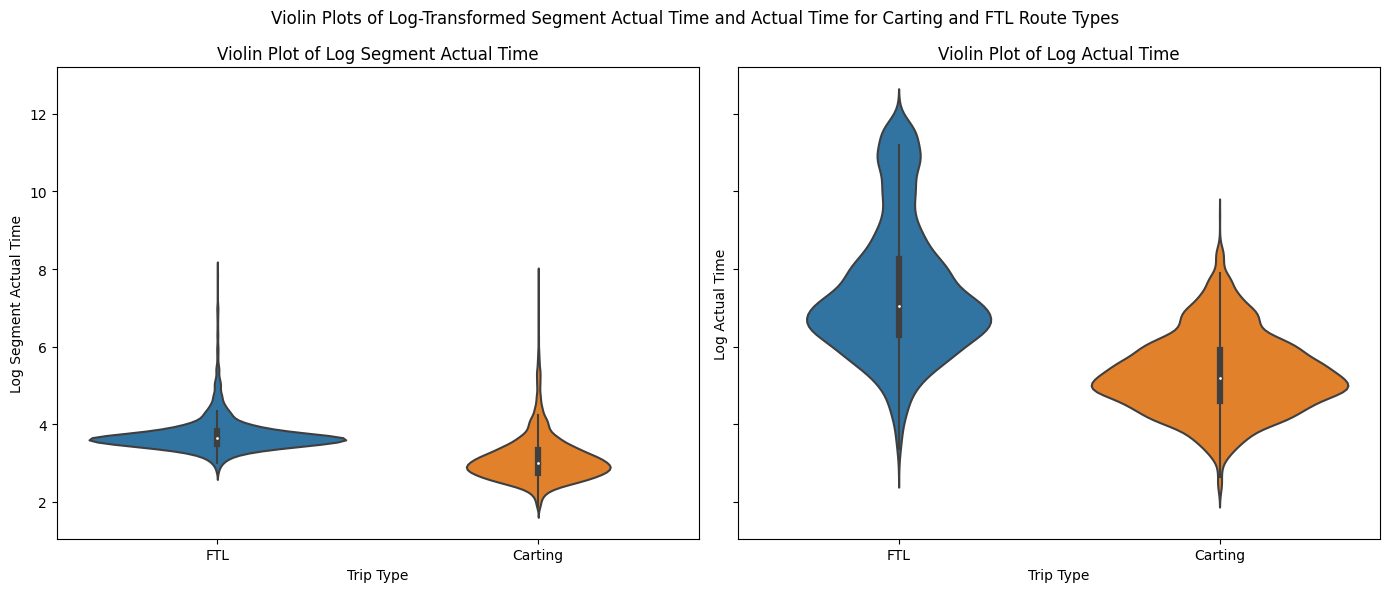

In [14]:
# Filter for Carting and FTL route types
filtered_summary = grouped_summary[grouped_summary['route_type'].isin(['Carting', 'FTL'])]

# Log-transform the time columns
filtered_summary['log_segment_actual_time'] = np.log(filtered_summary['segment_actual_time'])
filtered_summary['log_actual_time'] = np.log(filtered_summary['actual_time'])

# Create subplots for each time type
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot boxplot for log_segment_actual_time
sns.violinplot(ax=axes[0], data=filtered_summary, x='route_type', y='log_segment_actual_time')
axes[0].set_title('Violin Plot of Log Segment Actual Time')
axes[0].set_xlabel('Trip Type')
axes[0].set_ylabel('Log Segment Actual Time')

# Plot boxplot for log_actual_time
sns.violinplot(ax=axes[1], data=filtered_summary, x='route_type', y='log_actual_time')
axes[1].set_title('Violin Plot of Log Actual Time')
axes[1].set_xlabel('Trip Type')
axes[1].set_ylabel('Log Actual Time')

plt.suptitle('Violin Plots of Log-Transformed Segment Actual Time and Actual Time for Carting and FTL Route Types')
plt.tight_layout()
plt.show()

In [15]:
# Drop rows with null values in source_name and destination_name
grouped_summary = grouped_summary.dropna(subset=['source_name', 'destination_name'])

In [16]:
# Extracting state names
grouped_summary['source_state'] = grouped_summary['source_name'].str.extract(r'\((.*?)\)')
grouped_summary['destination_state'] = grouped_summary['destination_name'].str.extract(r'\((.*?)\)')
grouped_summary.head()

/tmp/ipykernel_18/3008347330.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_summary['source_state'] = grouped_summary['source_name'].str.extract(r'\((.*?)\)')
/tmp/ipykernel_18/3008347330.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_summary['destination_state'] = grouped_summary['destination_name'].str.extract(r'\((.*?)\)')


,trip_uuid,segment_osrm_distance,segment_osrm_time,segment_actual_time,actual_distance_to_destination,actual_time,source_name,destination_name,route_type,start_date,start_time,source_state,destination_state
0,trip-153671041653548748,33.858290,25.846154,39.692308,8860.812105,15682.0,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),FTL,2018-09-12,00:00:16,Madhya Pradesh,Uttar Pradesh
1,trip-153671042288605164,9.354378,7.222222,15.666667,240.208306,399.0,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),Carting,2018-09-12,00:00:22,Karnataka,Karnataka
2,trip-153671043369099517,28.598515,21.808989,37.168539,68163.502238,112225.0,Bangalore_Nelmngla_H (Karnataka),Gurgaon_Bilaspur_HB (Haryana),FTL,2018-09-12,00:00:33,Karnataka,Haryana
3,trip-153671046011330457,9.938300,8.000000,29.500000,28.529648,82.0,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),Carting,2018-09-12,00:01:00,Maharashtra,Maharashtra
4,trip-153671052974046625,20.970271,16.428571,48.571429,239.007304,556.0,Bellary_Dc (Karnataka),Hospet (Karnataka),FTL,2018-09-12,00:02:09,Karnataka,Karnataka


In [17]:
grouped_summary.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14800 entries, 0 to 14816
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   trip_uuid                       14800 non-null  object 
 1   segment_osrm_distance           14800 non-null  float64
 2   segment_osrm_time               14800 non-null  float64
 3   segment_actual_time             14800 non-null  float64
 4   actual_distance_to_destination  14800 non-null  float64
 5   actual_time                     14800 non-null  float64
 6   source_name                     14800 non-null  object 
 7   destination_name                14800 non-null  object 
 8   route_type                      14800 non-null  object 
 9   start_date                      14800 non-null  object 
 10  start_time                      14800 non-null  object 
 11  source_state                    14800 non-null  object 
 12  destination_state               14800

# Which states have most FTL trips?

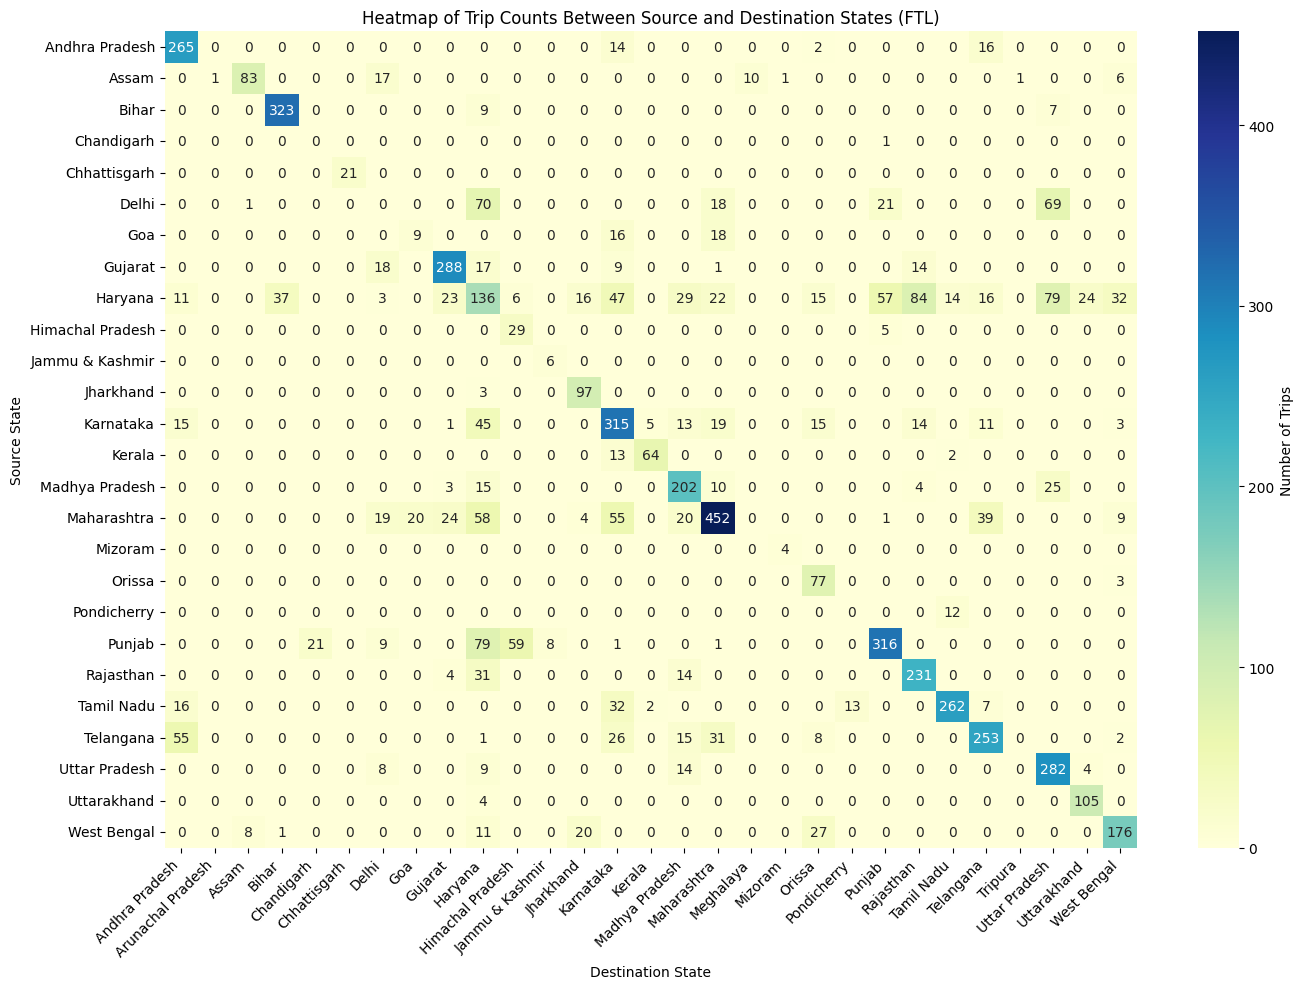

In [18]:
# Filter for route type 'FTL'
ftl_trips = grouped_summary[grouped_summary['route_type'] == 'FTL']

# Group by source and destination states and count trips
trip_counts = ftl_trips.groupby(['source_state', 'destination_state']).size().reset_index(name='trip_count')

# Pivot the data for heatmap
heatmap_data = trip_counts.pivot(index='source_state', columns='destination_state', values='trip_count').fillna(0)

# Plotting the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".0f", cbar_kws={'label': 'Number of Trips'})
plt.title('Heatmap of Trip Counts Between Source and Destination States (FTL)')
plt.xlabel('Destination State')
plt.ylabel('Source State')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Which states have most Carting trips?

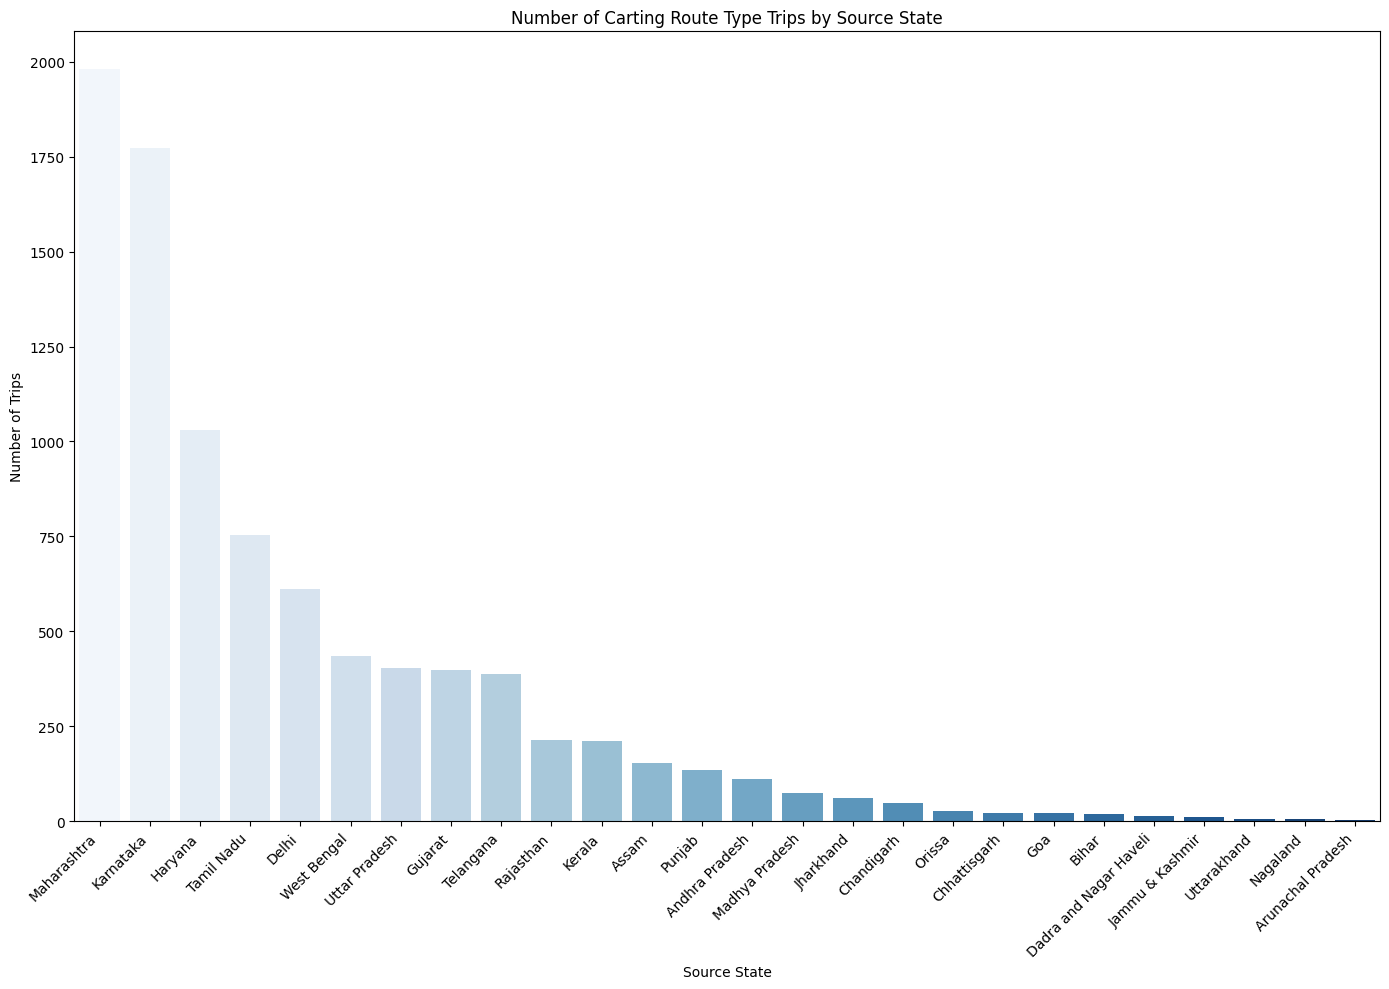

In [19]:
# Filter for 'Carting' route type
carting_trips = grouped_summary[grouped_summary['route_type'] == 'Carting']

# Group by source state and count trips
source_counts = carting_trips['source_state'].value_counts().reset_index()
source_counts.columns = ['source_state', 'trip_count']

# Plotting
plt.figure(figsize=(14, 10))
sns.barplot(data=source_counts, x='source_state', y='trip_count', palette='Blues')
plt.title('Number of Carting Route Type Trips by Source State')
plt.xlabel('Source State')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Correlation between segment actual and osrm times

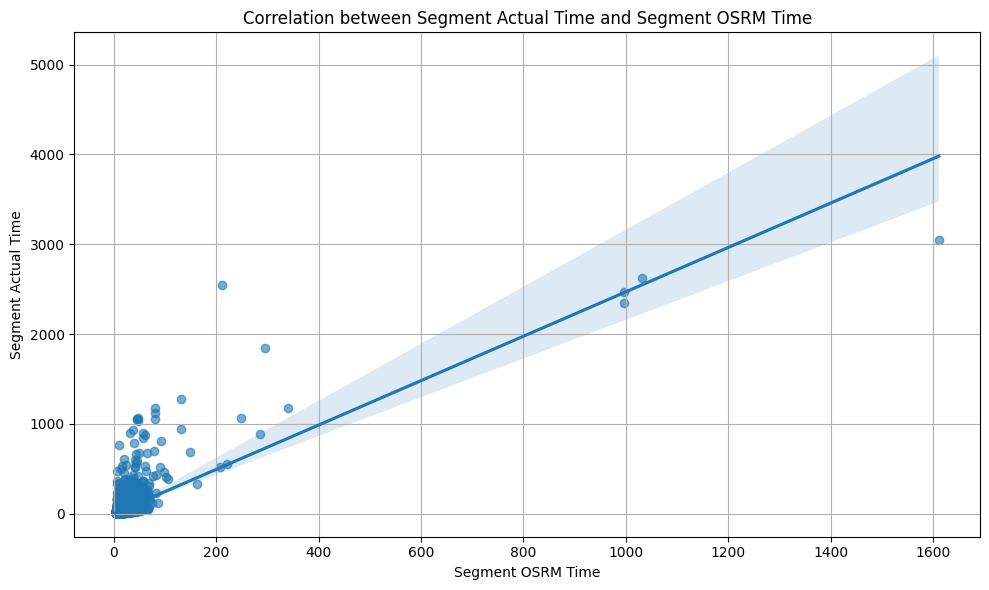

In [20]:
# Plotting the correlation
plt.figure(figsize=(10, 6))
sns.regplot(x='segment_osrm_time', y='segment_actual_time', data=grouped_summary, scatter_kws={'alpha': 0.6})
plt.title('Correlation between Segment Actual Time and Segment OSRM Time')
plt.xlabel('Segment OSRM Time')
plt.ylabel('Segment Actual Time')
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualising states on the map

I've used a predefined list of latitudes and longitudes (may be slightly inaccurate) due to API call issues with third party libraries.

In [21]:
import folium
from sklearn.cluster import KMeans

state_coords = {
    'Uttar Pradesh': (26.8467, 80.9462),
    'Karnataka': (15.3173, 75.7139),
    'Haryana': (29.0588, 76.0856),
    'Maharashtra': (19.7515, 75.7139),
    'Tamil Nadu': (11.1271, 78.6569),
    'Gujarat': (22.2587, 71.1924),
    'Delhi': (28.7041, 77.1025),
    'Andhra Pradesh': (15.9129, 79.74),
    'Telangana': (18.1124, 79.0193),
    'Rajasthan': (27.0238, 74.2179),
    'Madhya Pradesh': (22.9734, 78.6569),
    'Assam': (26.2006, 92.9376),
    'West Bengal': (22.9868, 87.855),
    'Punjab': (31.1471, 75.3412),
    'Chandigarh': (30.7333, 76.7794),
    'Dadra and Nagar Haveli': (20.1809, 73.0169),
    'Orissa': (20.9517, 85.0985),
    'Bihar': (25.0961, 85.3131),
    'Jharkhand': (23.6102, 85.2799),
    'Goa': (15.2993, 74.124),
    'Uttarakhand': (30.0668, 79.0193),
    'Himachal Pradesh': (31.1048, 77.1734),
    'Kerala': (10.8505, 76.2711),
    'Arunachal Pradesh': (28.217, 94.7278),
    'Pondicherry': (11.9416, 79.8083),
    'Chhattisgarh': (21.2787, 81.8661),
    'Jammu & Kashmir': (33.7782, 76.5762),
    'Meghalaya': (25.467, 91.3662),
    'Nagaland': (26.1584, 94.5624),
    'Tripura': (23.9408, 91.9882),
    'Mizoram': (23.1645, 92.9376),
    'Daman & Diu': (20.3974, 72.8328)
}

In [22]:
# Map coordinates from the state_coords dictionary
grouped_summary['source_coords'] = grouped_summary['source_state'].map(state_coords)
grouped_summary['destination_coords'] = grouped_summary['destination_state'].map(state_coords)

# Combine source and destination coordinates for clustering
coords = grouped_summary['source_coords'].tolist() + grouped_summary['destination_coords'].tolist()

# Drop NaN values from coords
cleaned_coords = [coord for coord in coords if coord is not None]

/tmp/ipykernel_18/1521945379.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_summary['source_coords'] = grouped_summary['source_state'].map(state_coords)
/tmp/ipykernel_18/1521945379.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_summary['destination_coords'] = grouped_summary['destination_state'].map(state_coords)


# Identifying route clusters with KMeans

In [23]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(cleaned_coords)
labels = kmeans.labels_

# Assign labels back to source and destination coordinates
source_labels = labels[:len(grouped_summary)]
destination_labels = labels[len(grouped_summary):]

# Add cluster labels to grouped_summary DataFrame
grouped_summary['source_cluster'] = source_labels
grouped_summary['destination_cluster'] = destination_labels

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_18/201630824.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_summary['source_cluster'] = source_labels
/tmp/ipykernel_18/201630824.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_summary['destination_cluster'] = destination_labels


In [24]:
import plotly.express as px
import plotly.graph_objects as go

# Prepare data for Plotly
source_df = grouped_summary[['source_state', 'source_coords', 'source_cluster']]
destination_df = grouped_summary[['destination_state', 'destination_coords', 'destination_cluster']]
source_df.columns = ['state', 'coords', 'cluster']
destination_df.columns = ['state', 'coords', 'cluster']
combined_df = pd.concat([source_df, destination_df])

# Split coordinates into latitude and longitude
combined_df['latitude'] = combined_df['coords'].apply(lambda x: x[0])
combined_df['longitude'] = combined_df['coords'].apply(lambda x: x[1])

# Plot using Plotly
fig = px.scatter_mapbox(
    combined_df,
    lat='latitude',
    lon='longitude',
    color='cluster',
    hover_name='state',
    zoom=5,
    title="Clustered Routes on Map"
)

# Update map layout
fig.update_layout(mapbox_style="carto-positron", mapbox_zoom=5, mapbox_center={"lat": 20.5937, "lon": 78.9629})
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

# Show the plot
fig.show()

In [25]:
# Convert trip_date to datetime
grouped_summary['start_date'] = pd.to_datetime(grouped_summary['start_date'])

/tmp/ipykernel_18/3727823488.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Route efficiency

Route cost is an important number to analyse efficiency. In the absence of cost daya, I've created an 'efficiency ratio' metric and used a predefined threshold of 2 to analyse route efficiencies (can be altered as per requirement)

In [26]:
# Calculate efficiency ratio
grouped_summary['efficiency_ratio'] = grouped_summary['segment_actual_time'] / grouped_summary['segment_osrm_time']

# Identify inefficient routes
inefficiency_threshold = 2
inefficient_routes = grouped_summary[grouped_summary['efficiency_ratio'] > inefficiency_threshold]
inefficient_routes

/tmp/ipykernel_18/1505528492.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,trip_uuid,segment_osrm_distance,segment_osrm_time,segment_actual_time,actual_distance_to_destination,actual_time,source_name,destination_name,route_type,start_date,start_time,source_state,destination_state,source_coords,destination_coords,source_cluster,destination_cluster,efficiency_ratio
1,trip-153671042288605164,9.354378,7.222222,15.666667,240.208306,399.0,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),Carting,2018-09-12,00:00:22,Karnataka,Karnataka,"(15.3173, 75.7139)","(15.3173, 75.7139)",1,1,2.169231
3,trip-153671046011330457,9.938300,8.000000,29.500000,28.529648,82.0,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),Carting,2018-09-12,00:01:00,Maharashtra,Maharashtra,"(19.7515, 75.7139)","(19.7515, 75.7139)",1,1,3.687500
4,trip-153671052974046625,20.970271,16.428571,48.571429,239.007304,556.0,Bellary_Dc (Karnataka),Hospet (Karnataka),FTL,2018-09-12,00:02:09,Karnataka,Karnataka,"(15.3173, 75.7139)","(15.3173, 75.7139)",1,1,2.956522
5,trip-153671055416136166,9.354900,7.666667,20.000000,34.407865,92.0,Chennai_Porur_DPC (Tamil Nadu),Chennai_Poonamallee (Tamil Nadu),Carting,2018-09-12,00:02:34,Tamil Nadu,Tamil Nadu,"(11.1271, 78.6569)","(11.1271, 78.6569)",1,1,2.608696
8,trip-153671074033284934,7.733950,7.250000,40.250000,44.084712,306.0,Surat_Central_I_4 (Gujarat),Surat_Central_D_3 (Gujarat),Carting,2018-09-12,00:05:40,Gujarat,Gujarat,"(22.2587, 71.1924)","(22.2587, 71.1924)",1,1,5.551724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14808,trip-153861089559302126,8.730575,7.500000,21.500000,50.007740,138.0,Mumbai_East_I_21 (Maharashtra),Mumbai_Ulhasngr_DC (Maharashtra),Carting,2018-10-03,23:54:55,Maharashtra,Maharashtra,"(19.7515, 75.7139)","(19.7515, 75.7139)",1,1,2.866667
14810,trip-153861090163768194,7.921800,5.500000,20.500000,24.811909,69.0,Chennai_Poonamallee (Tamil Nadu),Chennai_Sriperumbudur_Dc (Tamil Nadu),Carting,2018-10-04,02:09:14,Tamil Nadu,Tamil Nadu,"(11.1271, 78.6569)","(11.1271, 78.6569)",1,1,3.727273
14811,trip-153861091843037040,10.253250,8.000000,18.500000,27.866212,57.0,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),Carting,2018-10-03,23:55:18,Maharashtra,Maharashtra,"(19.7515, 75.7139)","(19.7515, 75.7139)",1,1,2.312500
14814,trip-153861106442901555,17.481100,14.666667,46.833333,93.743842,549.0,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_GovndNgr_DC (Uttar Pradesh),Carting,2018-10-03,23:57:44,Uttar Pradesh,Uttar Pradesh,"(26.8467, 80.9462)","(26.8467, 80.9462)",0,0,3.193182


/tmp/ipykernel_18/129471621.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_18/129471621.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



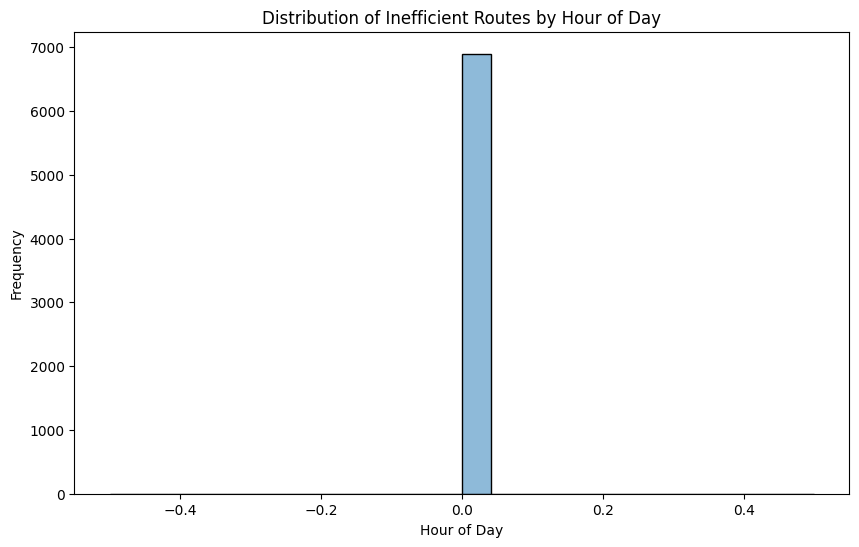

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



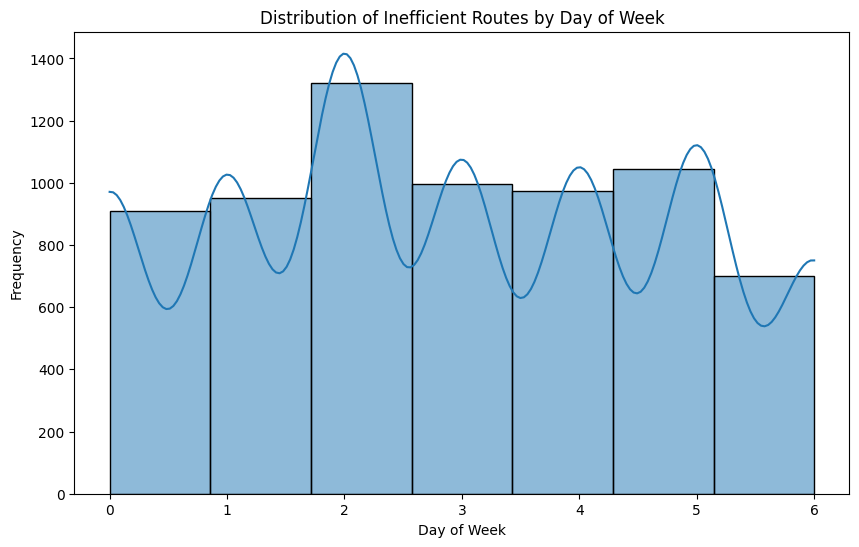

In [27]:
# Analyze patterns
inefficient_routes['hour'] = pd.to_datetime(inefficient_routes['start_date']).dt.hour
inefficient_routes['day_of_week'] = pd.to_datetime(inefficient_routes['start_date']).dt.dayofweek

# Plotting to identify patterns
plt.figure(figsize=(10, 6))
sns.histplot(inefficient_routes['hour'], bins=24, kde=True)
plt.title('Distribution of Inefficient Routes by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(inefficient_routes['day_of_week'], bins=7, kde=True)
plt.title('Distribution of Inefficient Routes by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency')
plt.show()

Mid week seems to be more inefficient.

# Route Efficiency by Origin and Peak Hours

### I've created a function called 'is_peak' to define peak hours

### First we look at the top 10 routes (source name) where the time difference between segment_actual_time and segment_osrm_time are highest

In [28]:
grouped_summary['start_time'] = pd.to_datetime(grouped_summary['start_time'])

# Define peak hours (e.g., 8-10 AM and 5-7 PM)
def is_peak_hour(timestamp):
    hour = timestamp.hour
    return (8 <= hour < 10) or (17 <= hour < 19)

# Filter for peak hours
grouped_summary['is_peak'] = grouped_summary['start_time'].apply(is_peak_hour)
peak_hours_data = grouped_summary[grouped_summary['is_peak']]

# Calculate efficiency metrics for peak hours
route_efficiency_peak = peak_hours_data.groupby(['source_name', 'destination_name']).agg({
    'segment_actual_time': 'mean',
    'segment_osrm_time': 'mean'
}).reset_index()

# Calculate time difference
route_efficiency_peak['time_difference'] = route_efficiency_peak['segment_actual_time'] - route_efficiency_peak['segment_osrm_time']

# Get top 10 routes with the highest time difference
top_routes = route_efficiency_peak.nlargest(10, 'time_difference')

/tmp/ipykernel_18/2043445151.py:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

/tmp/ipykernel_18/2043445151.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_18/2043445151.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



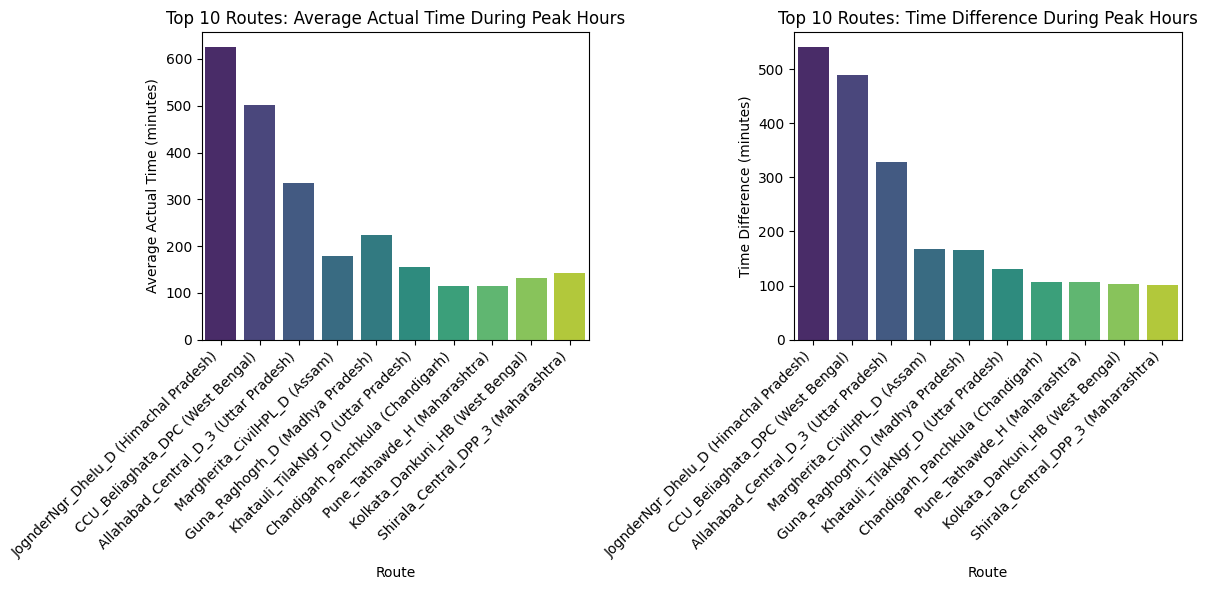

In [29]:
# Plotting the efficiency during peak hours for top routes
plt.figure(figsize=(12, 6))

# Barplot for Average Actual Time during Peak Hours
plt.subplot(1, 2, 1)
sns.barplot(data=top_routes, x='source_name', y='segment_actual_time', palette='viridis')
plt.title('Top 10 Routes: Average Actual Time During Peak Hours')
plt.xlabel('Route')
plt.ylabel('Average Actual Time (minutes)')
plt.xticks(rotation=45, ha='right')

# Barplot for Time Difference during Peak Hours
plt.subplot(1, 2, 2)
sns.barplot(data=top_routes, x='source_name', y='time_difference', palette='viridis')
plt.title('Top 10 Routes: Time Difference During Peak Hours')
plt.xlabel('Route')
plt.ylabel('Time Difference (minutes)')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

### We also look at all routes 

In [30]:
# Create an interactive scatter plot for peak hour efficiencies
fig = px.scatter(route_efficiency_peak, 
                 x='segment_osrm_time', 
                 y='segment_actual_time', 
                 color='time_difference',
                 hover_name='source_name',
                 title='Route Efficiency During Peak Hours')
fig.show()

## Peak hour trends by state

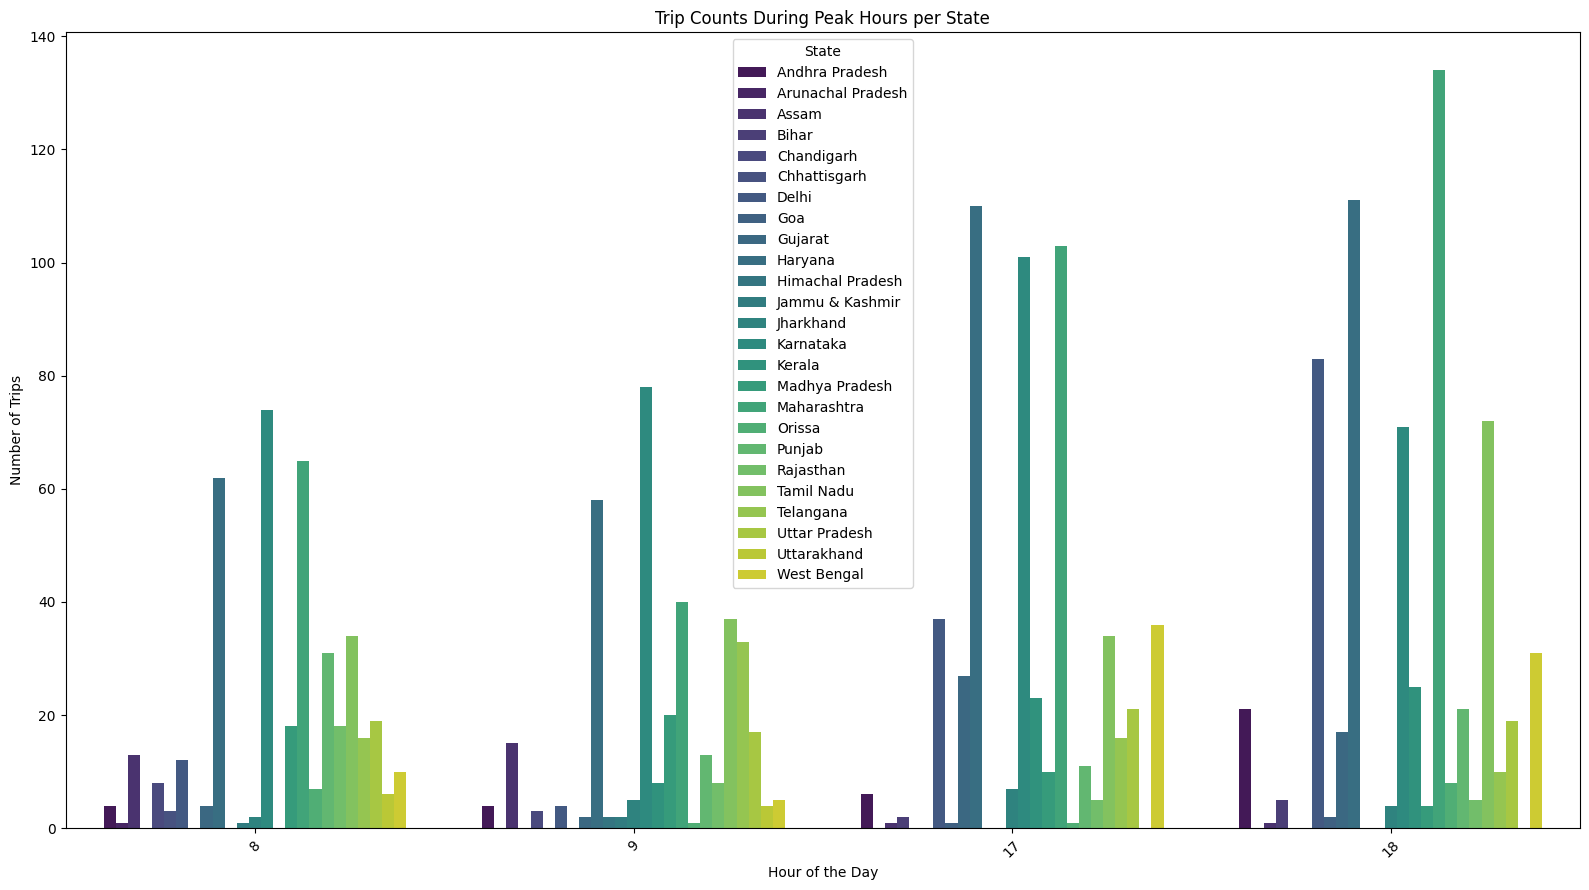

In [31]:
# Count trips per state and hour during peak hours
peak_hour_trends = grouped_summary[grouped_summary['is_peak']].copy()
peak_hour_trends['hour'] = peak_hour_trends['start_time'].dt.hour
peak_hour_counts = peak_hour_trends.groupby(['source_state', 'hour']).size().reset_index(name='trip_count')

# Plotting peak hour trends per state
plt.figure(figsize=(16,9))
sns.barplot(data=peak_hour_counts, x='hour', y='trip_count', hue='source_state', palette='viridis')
plt.title('Trip Counts During Peak Hours per State')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.legend(title='State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [32]:
# Calculate average times by state
efficiency_trends = grouped_summary.groupby('source_state').agg({
    'segment_actual_time': 'mean',
    'segment_osrm_time': 'mean'
}).reset_index()

# Calculate time difference
efficiency_trends['time_difference'] = efficiency_trends['segment_actual_time'] - efficiency_trends['segment_osrm_time']


### Efficiency trends by state

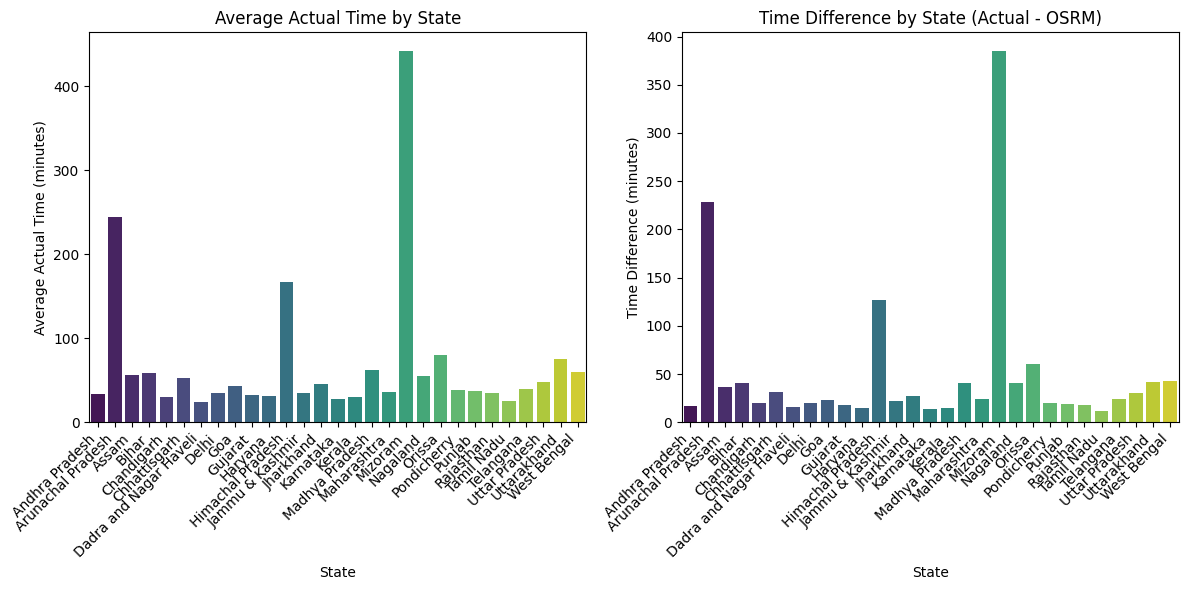

In [33]:
# Plotting efficiency trends for different states
plt.figure(figsize=(12, 6))

# Barplot for Average Actual Time
plt.subplot(1, 2, 1)
sns.barplot(data=efficiency_trends, x='source_state', y='segment_actual_time', palette='viridis')
plt.title('Average Actual Time by State')
plt.xlabel('State')
plt.ylabel('Average Actual Time (minutes)')
plt.xticks(rotation=45, ha='right')

# Barplot for Time Difference
plt.subplot(1, 2, 2)
sns.barplot(data=efficiency_trends, x='source_state', y='time_difference', palette='viridis')
plt.title('Time Difference by State (Actual - OSRM)')
plt.xlabel('State')
plt.ylabel('Time Difference (minutes)')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Northeastern states like Mizoram and Arunachal Pradesh show vey high actual times as well as time differences. This is not surprising - given the difficult terrain in the interiors of these regions.

## Efficiency Clusters

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



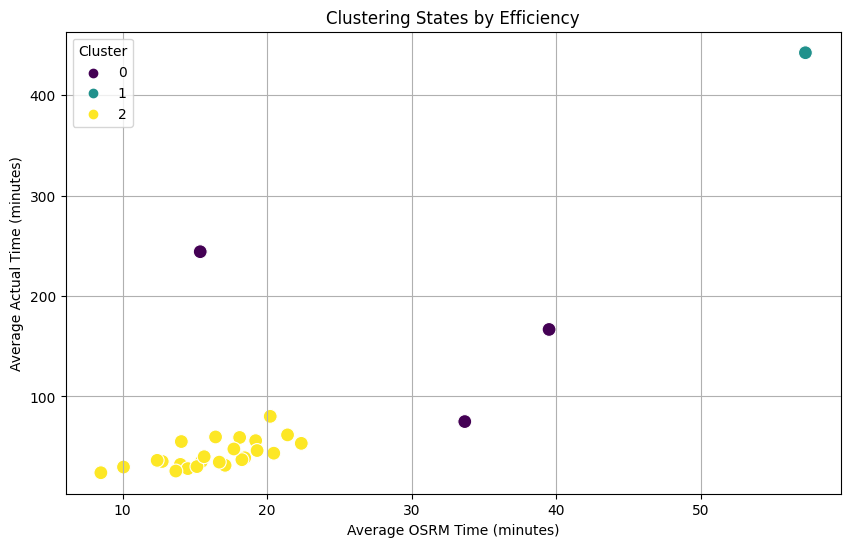

In [34]:
from sklearn.preprocessing import StandardScaler

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(efficiency_trends[['segment_actual_time', 'segment_osrm_time']])

# Applying KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
efficiency_trends['cluster'] = kmeans.fit_predict(scaled_data)

# Plotting clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=efficiency_trends, x='segment_osrm_time', y='segment_actual_time', hue='cluster', palette='viridis', s=100)
plt.title('Clustering States by Efficiency')
plt.xlabel('Average OSRM Time (minutes)')
plt.ylabel('Average Actual Time (minutes)')
plt.legend(title='Cluster')
plt.grid()
plt.show()

# Peak Hour Trends for FTL Trips

/tmp/ipykernel_18/2159364164.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



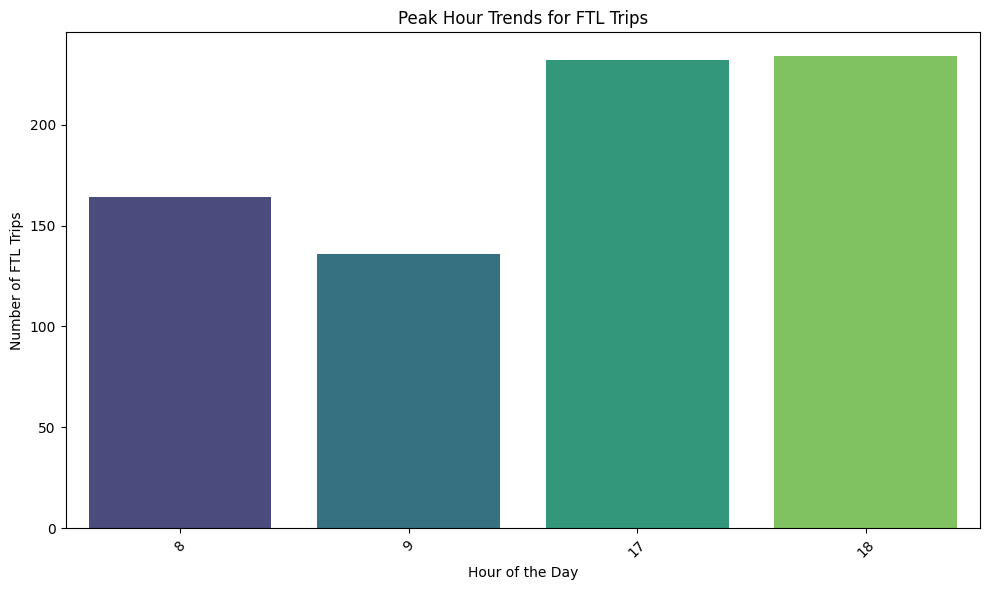

In [35]:
# Filter for FTL trips
ftl_trips = grouped_summary[grouped_summary['route_type'] == 'FTL']

# Filter for peak hours
ftl_trips['is_peak'] = ftl_trips['start_time'].apply(is_peak_hour)

# Count trips per hour during peak hours
peak_hour_counts = ftl_trips[ftl_trips['is_peak']].copy()
peak_hour_counts['hour'] = peak_hour_counts['start_time'].dt.hour
peak_hour_trends = peak_hour_counts.groupby('hour').size().reset_index(name='trip_count')

# Plotting peak hour trends for FTL
plt.figure(figsize=(10, 6))
sns.barplot(data=peak_hour_trends, x='hour', y='trip_count', palette='viridis')
plt.title('Peak Hour Trends for FTL Trips')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of FTL Trips')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

A high number of trips start at and after 5pm - possibly indicating high order flow on ecommerce portals during the second half of the day.

# Average Trip Times by Type

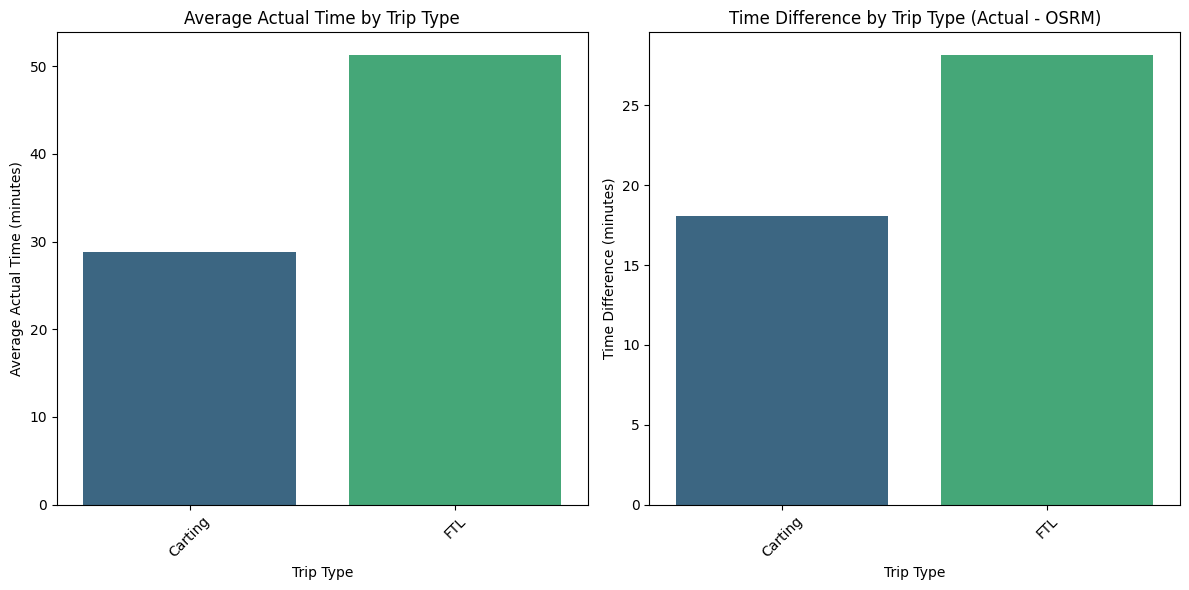

In [36]:
# Calculate average times by trip type
efficiency_summary = grouped_summary.groupby('route_type').agg({
    'segment_actual_time': 'mean',
    'segment_osrm_time': 'mean'
}).reset_index()

# Calculate time difference
efficiency_summary['time_difference'] = efficiency_summary['segment_actual_time'] - efficiency_summary['segment_osrm_time']

# Plotting overall trip efficiency comparisons
plt.figure(figsize=(12, 6))

# Barplot for Average Actual Time
plt.subplot(1, 2, 1)
sns.barplot(data=efficiency_summary, x='route_type', y='segment_actual_time', palette='viridis')
plt.title('Average Actual Time by Trip Type')
plt.xlabel('Trip Type')
plt.ylabel('Average Actual Time (minutes)')
plt.xticks(rotation=45)

# Barplot for Time Difference
plt.subplot(1, 2, 2)
sns.barplot(data=efficiency_summary, x='route_type', y='time_difference', palette='viridis')
plt.title('Time Difference by Trip Type (Actual - OSRM)')
plt.xlabel('Trip Type')
plt.ylabel('Time Difference (minutes)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Date wise trip time trends

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



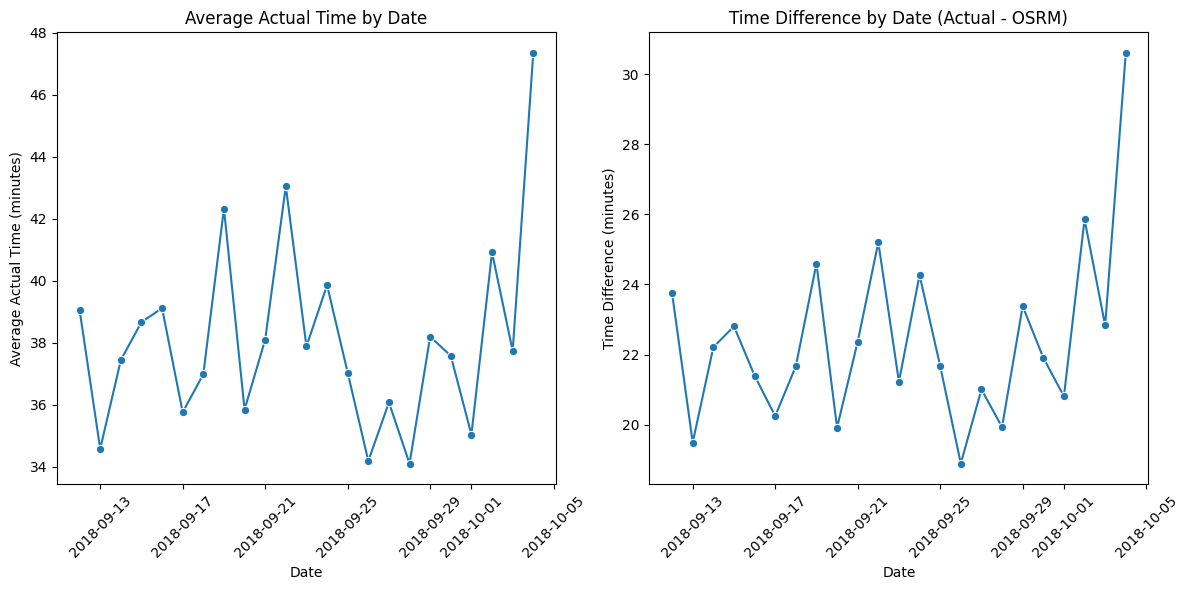

In [37]:
# Calculate average times by date
efficiency_by_date = grouped_summary.groupby('start_date').agg({
    'segment_actual_time': 'mean',
    'segment_osrm_time': 'mean'
}).reset_index()

# Calculate time difference
efficiency_by_date['time_difference'] = efficiency_by_date['segment_actual_time'] - efficiency_by_date['segment_osrm_time']

# Plotting route efficiency over different days
plt.figure(figsize=(12, 6))

# Line plot for Average Actual Time
plt.subplot(1, 2, 1)
sns.lineplot(data=efficiency_by_date, x='start_date', y='segment_actual_time', marker='o')
plt.title('Average Actual Time by Date')
plt.xlabel('Date')
plt.ylabel('Average Actual Time (minutes)')
plt.xticks(rotation=45)

# Line plot for Time Difference
plt.subplot(1, 2, 2)
sns.lineplot(data=efficiency_by_date, x='start_date', y='time_difference', marker='o')
plt.title('Time Difference by Date (Actual - OSRM)')
plt.xlabel('Date')
plt.ylabel('Time Difference (minutes)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

The trips for the entire dataset is concentrated around the months of September and October. And we see trip times shooting up from October - again indicating high order flow given the festival of Diwali falls within 3-4 weeks from the beginning of October.

# Outlier Routes

### Last but not the least, we try and identify some outlier routes.

/tmp/ipykernel_18/2838803893.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



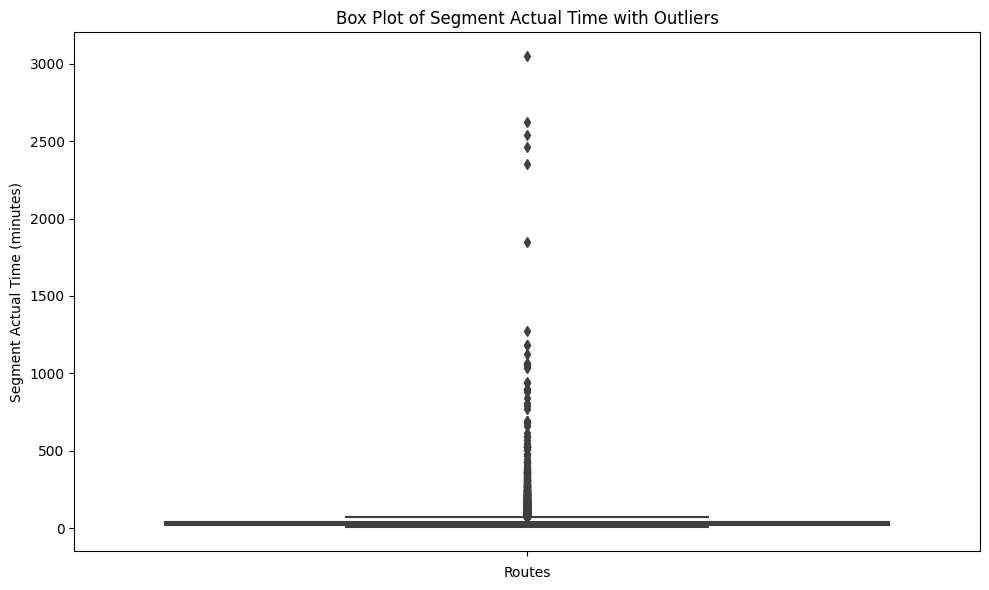

Outlier Routes:


,route_name,segment_actual_time,segment_osrm_time
12,Kolhapur_Shivaji_I (Maharashtra) to Ratnagiri_...,75.900000,22.400000
20,Kanpur_Central_H_6 (Uttar Pradesh) to Unnao_Vi...,84.300000,9.100000
42,Bhatinda_DPC (Punjab) to TalwandiSabo_Wardno3_...,72.166667,30.833333
98,Pune_Tathawde_H (Maharashtra) to Bhiwandi_Mank...,409.000000,102.000000
118,Ghumarwin_Gndhichk_D (Himachal Pradesh) to Jah...,155.625000,32.250000
...,...,...,...
14739,Warangal_Central_D_2 (Telangana) to Husnabad_G...,75.800000,23.800000
14753,Dhule_MIDCAvdn_I (Maharashtra) to Sakri_DhuleR...,129.200000,18.400000
14764,Jabalpur_Adhartal_IP (Madhya Pradesh) to Jabal...,226.000000,8.000000
14772,Hyderabad_Uppal_I (Telangana) to Hyderabad_Sha...,303.000000,24.000000


In [38]:
# Calculate average times by route
outlier_summary = grouped_summary.groupby('trip_uuid').agg({
    'segment_actual_time': 'mean',
    'segment_osrm_time': 'mean',
    'source_name': 'first',  # Keep the first source_name
    'destination_name': 'first'  # Keep the first destination_name
}).reset_index()

# Identify outliers using the IQR method
Q1 = outlier_summary['segment_actual_time'].quantile(0.25)
Q3 = outlier_summary['segment_actual_time'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outlier routes
outlier_summary['is_outlier'] = outlier_summary['segment_actual_time'].apply(
    lambda x: x < lower_bound or x > upper_bound)

# Extract outlier routes
outlier_routes = outlier_summary[outlier_summary['is_outlier']]

# Create a route name by joining source and destination
outlier_routes['route_name'] = outlier_routes['source_name'] + " to " + outlier_routes['destination_name']

# Visualizing outlier routes with a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=outlier_summary, y='segment_actual_time')
plt.title('Box Plot of Segment Actual Time with Outliers')
plt.ylabel('Segment Actual Time (minutes)')
plt.xlabel('Routes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print outlier routes
print("Outlier Routes:")
outlier_routes[['route_name', 'segment_actual_time', 'segment_osrm_time']]